<a href="https://colab.research.google.com/github/ArturSampaio/dashboard-rfm-ecommerce/blob/main/online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Varejo Online: Um Estudo de Caso para Otimização de Marketing

Este projeto tem como objetivo principal demonstrar habilidades em análise de dados, desde a limpeza e pré-processamento até a segmentação de clientes e a visualização de resultados. O foco é extrair insights acionáveis de um conjunto de dados transacionais de um varejista online para otimizar estratégias de marketing e vendas, culminando na preparação para um dashboard interativo em Power BI.

---

## Etapa 1: Carregamento, Limpeza e Análise Exploratória Inicial dos Dados

A base de qualquer análise robusta de dados é a sua preparação. Esta seção detalha o processo inicial de carregamento do dataset, a inspeção de sua estrutura e qualidade, e as primeiras etapas de limpeza e pré-processamento para garantir que os dados estejam aptos para análises mais aprofundadas.

### 1.1. Carregamento e Visão Geral Inicial do Dataset

O dataset foi carregado utilizando a biblioteca `pandas`, permitindo uma inspeção rápida das primeiras linhas e uma visão geral da estrutura com `df.info()`.

#### Primeiras Linhas do DataFrame (`df.head()`)

| InvoiceNo | StockCode | Description | Quantity | InvoiceDate | UnitPrice | CustomerID | Country |
|---|---|---|---|---|---|---|---|
| 536365 | 85123A | WHITE HANGING HEART T-LIGHT HOLDER | 6 | 12/1/2010 8:26 | 2.55 | 17850.0 | United Kingdom |
| 536365 | 71053 | WHITE METAL LANTERN | 6 | 12/1/2010 8:26 | 3.39 | 17850.0 | United Kingdom |
| 536365 | 84406B | CREAM CUPID HEARTS COAT HANGER | 8 | 12/1/2010 8:26 | 2.75 | 17850.0 | United Kingdom |
| 536365 | 84029G | KNITTED UNION FLAG HOT WATER BOTTLE | 6 | 12/1/2010 8:26 | 3.39 | 17850.0 | United Kingdom |
| 536365 | 84029E | RED WOOLLY HOTTIE WHITE HEART. | 6 | 12/1/2010 8:26 | 3.39 | 17850.0 | United Kingdom |

#### Informações do DataFrame (`df.info()`) - Estado Inicial

**Principais Descobertas Iniciais:**
*   **`InvoiceDate`:** Está como `object`, necessitando conversão para `datetime` para análises temporais.
*   **Valores Ausentes (NaNs):** As colunas `Description` (1.454) e, principalmente, `CustomerID` (135.080) possuem um número significativo de valores nulos.
*   **Tipos de Dados:** `CustomerID` é `float64` devido aos NaNs, e precisará ser ajustado para `int` após a remoção dos nulos.

#### Estatísticas Descritivas e Contagem de Valores Ausentes (`df.describe()` e `df.isnull().sum()`) - Estado Inicial

| Métrica | Quantity | UnitPrice | CustomerID |
|:--------|:---------|:----------|:-----------|
| count   | 541909.000000 | 541909.000000 | 406829.000000 |
| mean    | 9.552250 | 4.611114 | 15287.690570 |
| std     | 218.081158 | 96.759853 | 1713.600303 |
| min     | -80995.000000 | -11062.060000 | 12346.000000 |
| 25%     | 1.000000 | 1.250000 | 13953.000000 |
| 50%     | 3.000000 | 2.080000 | 15152.000000 |
| 75%     | 10.000000 | 4.130000 | 16791.000000 |
| max     | 80995.000000 | 38970.000000 | 18287.000000 |

InvoiceNo 0 StockCode 0 Description 1454 Quantity 0 InvoiceDate 0 UnitPrice 0 CustomerID 135080 Country 0 dtype: int64


**Problemas Adicionais Identificados:**
*   **`Quantity` e `UnitPrice`:** A presença de valores mínimos negativos (`-80995` e `-11062.06`) indica transações de devolução/cancelamento ou erros de registro, que precisam ser removidos para uma análise de vendas focada em faturamento positivo.
*   **Número de Linhas:** O dataset possui 541.909 entradas, mas a análise revelou que uma parte significativa requer limpeza.

### 1.2. Limpeza e Pré-processamento dos Dados

Para garantir a qualidade dos dados para as análises subsequentes (especialmente a RFM), as seguintes transformações e filtragens foram aplicadas:

1.  **Conversão de Tipo:** A coluna `InvoiceDate` foi convertida para o formato `datetime`.
2.  **Criação de `TotalPrice`:** Uma nova coluna, `TotalPrice` (resultado de `Quantity * UnitPrice`), foi criada para representar o valor total de cada item da transação.
3.  **Filtragem de Transações Inválidas:**
    *   Remoção de transações de cancelamento (identificadas por `InvoiceNo` começando com 'C').
    *   Remoção de linhas com `Quantity` menor ou igual a zero.
    *   Remoção de linhas com `UnitPrice` menor ou igual a zero.
4.  **Tratamento de Valores Ausentes:**
    *   Linhas com `CustomerID` nulo foram removidas, pois a identificação do cliente é essencial para a análise RFM.
    *   Linhas com `Description` nulo também foram removidas para manter a integridade dos dados de produtos.
5.  **Ajuste de Tipo:** A coluna `CustomerID` foi convertida de `float` para `int`, uma vez que todos os valores ausentes foram tratados.

#### Resultados da Limpeza e Pré-processamento

Após as etapas de limpeza, o DataFrame foi reduzido de **541.909 para 397.884
linhas**, resultando em **144.025 linhas removidas**. Este novo DataFrame representa um conjunto de dados limpo, coerente e pronto para análise.

#### Informações do DataFrame (`df.info()`) - Estado Final Pós-Limpeza

#### Estatísticas Descritivas e Contagem de Valores Ausentes (`df.describe()` e `df.isnull().sum()`) - Estado Final Pós-Limpeza

| Métrica | CustomerID | Recency | Frequency | Monetary |
|:--------|:-----------|:--------|:----------|:---------|
| count   | 4338.000000 | 4338.000000 | 4338.000000 | 4338.000000 |
| mean    | 15300.408022 | 92.536422 | 4.272015 | 2054.266460 |
| std     | 1721.808492 | 100.014169 | 7.697998 | 8989.230441 |
| min     | 12346.000000 | 1.000000 | 1.000000 | 3.750000 |
| 25%     | 13813.250000 | 18.000000 | 1.000000 | 307.415000 |
| 50%     | 15299.500000 | 51.000000 | 2.000000 | 674.485000 |
| 75%     | 16778.750000 | 142.000000 | 5.000000 | 1661.740000 |
| max     | 18287.000000 | 374.000000 | 209.000000 | 280206.020000 |

InvoiceNo 0 StockCode 0 Description 0 Quantity 0 InvoiceDate 0 UnitPrice 0 CustomerID 0 Country 0 TotalPrice 0 dtype: int64


### 1.3. Análise Exploratória de Dados (EDA) - Tendências e Sazonalidade

Com o dataset limpo, realizamos as primeiras análises exploratórias para identificar padrões e tendências nas vendas ao longo do tempo.

#### Faturamento Diário ao Longo do Tempo

https://drive.google.com/file/d/11xPNmdFRsXLQe4DSkkv9mMD55C6aqfWB/view?usp=sharing)

*   **Insight:** O gráfico demonstra uma **clara tendência de crescimento** no faturamento ao longo do ano de 2011, com picos significativos no último trimestre. Existem lacunas de dados que correspondem a dias de inatividade (provavelmente fins de semana e feriados).

#### Número de Pedidos Diários ao Longo do Tempo

https://drive.google.com/file/d/1AyZe3s1sgTnO7wv577DUYGJ9b4xFaSEj/view?usp=sharing

*   **Insight:** A curva do número de pedidos espelha a do faturamento, confirmando que o aumento no volume de transações é o principal motor do crescimento observado.

#### Média de Faturamento por Pedido por Mês

https://drive.google.com/file/d/1f5uO2PmXzX2e2L5aRA9gvxBT2WB8C4hx/view?usp=sharing

*   **Insight:** Embora o volume de vendas aumente no final do ano, a média de faturamento por pedido em **Novembro é a menor**. Isso sugere que o alto volume pode ser impulsionado por promoções ou vendas de itens de menor valor, uma característica comum em períodos como Black Friday.

#### Média de Faturamento por Pedido por Dia da Semana

https://drive.google.com/file/d/1ppdbpPRlRxMAScwxK8KMPCWMc4LXW_2d/view?usp=sharing

*   **Insight:** **Sexta-feira e Terça-feira** apresentam as maiores médias de faturamento por pedido, enquanto o **Domingo** é o dia com a menor média. Este padrão indica que o comportamento de compra varia significativamente ao longo da semana.

Esta análise inicial nos fornece uma compreensão robusta do histórico de vendas e dos padrões sazonais, preparando o terreno para uma análise mais detalhada do comportamento do cliente através da segmentação RFM.



In [ ]:
# Importando biblioteca pandas para manipulação dos dados
import pandas as pd

# Carregando a base de dados
base = 'online_store.csv'
df = pd.read_csv(base, header=0, encoding='latin1')

In [ ]:
# Visualização das primeiras linhas da base

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Obtendo informações gerais sobre a base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Obtendo estatísticas descritivas para colunas numéricas

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Verificando número de valores ausentes por coluna

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Converção de 'InvoiceDate' para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Criação da coluna 'TotalPrice' multiplicando Quantity por UnitPrice para
# obter o preço total de cada linha de item.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [ ]:
# Tratamento de valores negativos/zero em 'Quantity' e 'UnitPrice'
# Para uma análise de vendas, precisamos de transações com quantidades e
# preços unitários positivos.
# Além disso, o dataset original tem InvoiceNo que começam com 'C'
# para cancelamentos que devem ser removidos juntamente com Quantity
# e UnitPrice negativos

df_original_rows = len(df)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

print(f"Número de linhas original: {df_original_rows}")
print(f"Número de linhas após limpeza: {len(df)}")
print(f"Linhas removidas: {df_original_rows - len(df)}")

Número de linhas original: 541909
Número de linhas após limpeza: 530104
Linhas removidas: 11805


In [ ]:
# Tratamento de valores ausentes em 'CustomerID' e 'Description'

df_original_2 = len(df)

df.dropna(subset=['CustomerID'], inplace=True)

df.dropna(subset=['Description'], inplace=True)

print(f"Número de linhas original: {df_original_2}")
print(f"Número de linhas após remover NaNs: {len(df)}")
print(f"Linhas removidas devido a NaNs: {df_original_2 - len(df)}")

Número de linhas original: 530104
Número de linhas após remover NaNs: 397884
Linhas removidas devido a NaNs: 132220


In [ ]:
# Ajuste do tipo de dado de CustomerID para int

df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
# Verificação final após limpeza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [ ]:
# Verificação final após limpeza
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID     TotalPrice  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.141560     309.071041  


In [ ]:
# Verificação final após limpeza
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [ ]:
# Importando bibliotecas para visualização e
# estabelecendo padrão gráfico "clean"
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

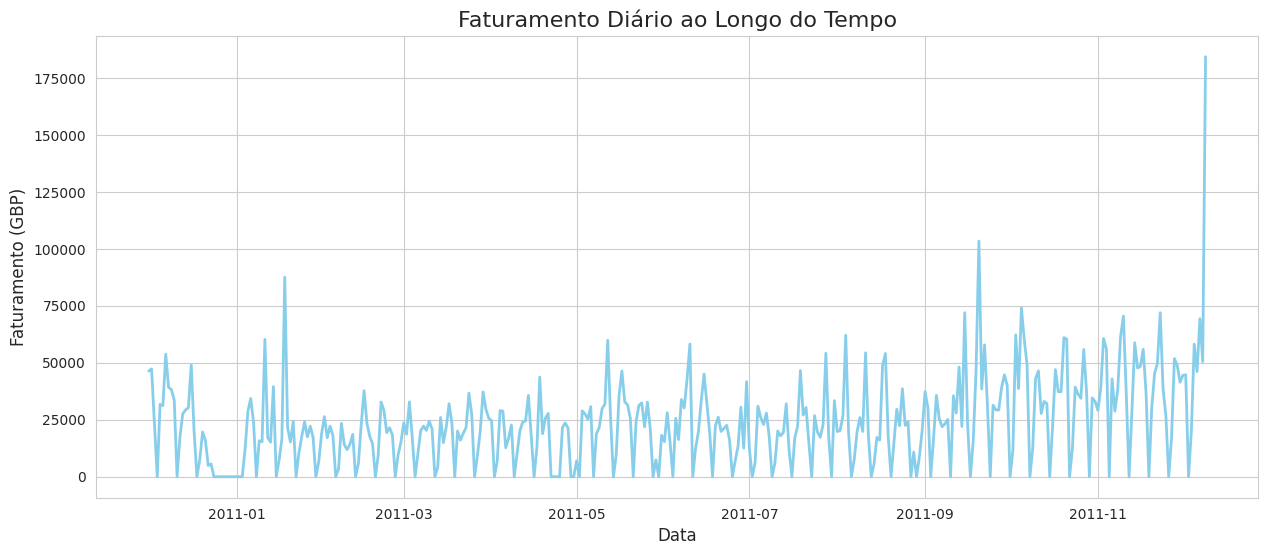

In [ ]:
# Total de Vendas (Faturamento) ao Longo do Tempo

# Agrupamento por data da fatura e totalizado o TotalPrice para cada dia (D).
sales_over_time = df.set_index('InvoiceDate')['TotalPrice'].resample('D').sum()

plt.figure(figsize=(15, 6))
plt.plot(sales_over_time.index, sales_over_time.values, color='skyblue', linewidth=2)
plt.title('Faturamento Diário ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Faturamento (GBP)', fontsize=12)
plt.grid(True)
plt.show()

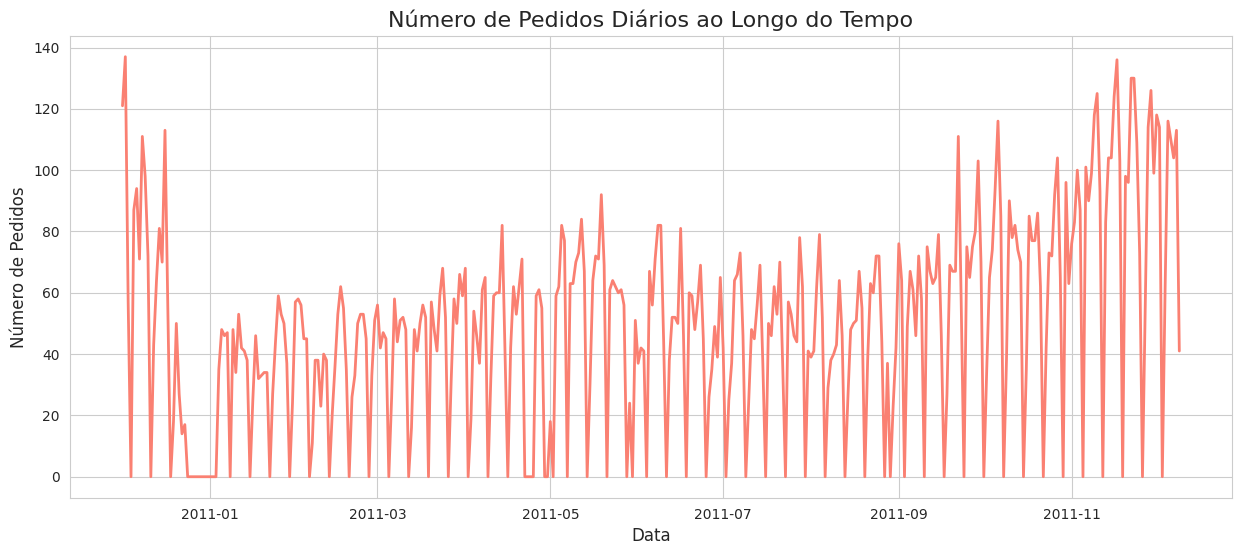

In [ ]:
# Número de Transações (Pedidos) ao Longo do Tempo
# Contagem do número de faturas únicas por dia.
transactions_over_time = df.set_index('InvoiceDate').groupby(pd.Grouper(freq='D'))['InvoiceNo'].nunique()

plt.figure(figsize=(15, 6))
plt.plot(transactions_over_time.index, transactions_over_time.values, color='salmon', linewidth=2)
plt.title('Número de Pedidos Diários ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipython-input-25-2223041201.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, palette='viridis')


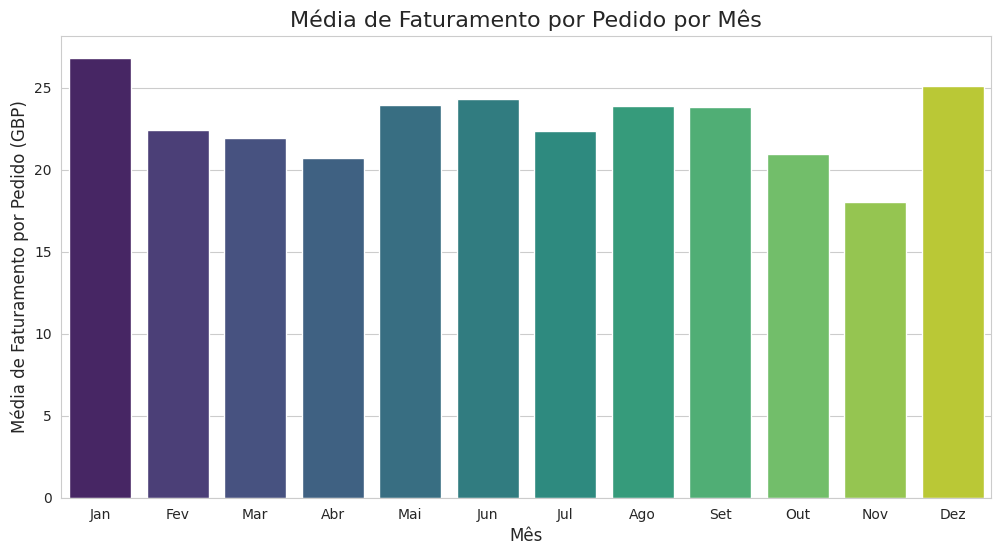

In [ ]:
# Média de Vendas por Mês (Analisando Sazonalidade Mensal)
# Extraindo o mês da data da fatura
df['Month'] = df['InvoiceDate'].dt.month

# Calculando a média de TotalPrice por mês
monthly_avg_sales = df.groupby('Month')['TotalPrice'].mean()

# Criando os nomes dos meses para melhor visualização
month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
monthly_avg_sales.index = monthly_avg_sales.index.map(lambda x: month_names[x-1])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, palette='viridis')
plt.title('Média de Faturamento por Pedido por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média de Faturamento por Pedido (GBP)', fontsize=12)
plt.show()

/tmp/ipython-input-26-2481772209.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_sales.index, y=daily_avg_sales.values, palette='magma')


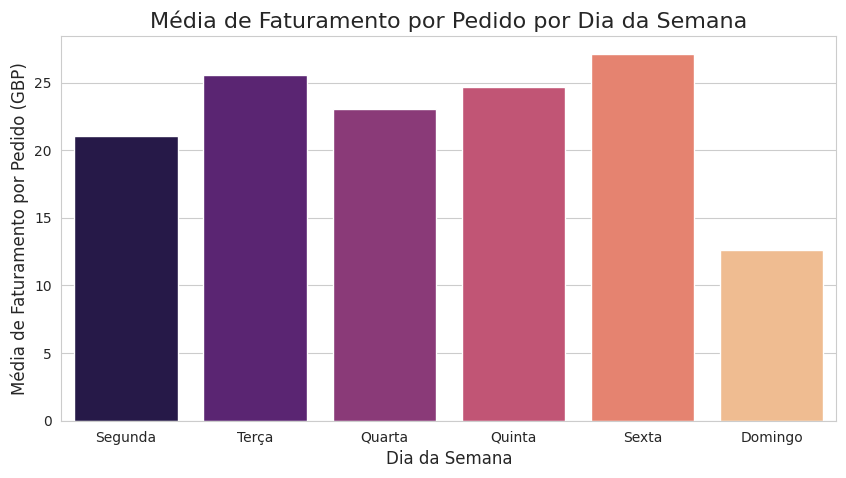

In [ ]:
# Média de Vendas por Dia da Semana (Analisando Padrões Semanais)
# Extraindo o dia da semana da data da fatura
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Calculando a média de TotalPrice por dia da semana
daily_avg_sales = df.groupby('DayOfWeek')['TotalPrice'].mean()

# Criando os nomes dos dias para melhor visualização
day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
daily_avg_sales.index = daily_avg_sales.index.map(lambda x: day_names[x])

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg_sales.index, y=daily_avg_sales.values, palette='magma')
plt.title('Média de Faturamento por Pedido por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Faturamento por Pedido (GBP)', fontsize=12)
plt.show()

## Etapa 2: Análise e Interpretação dos Segmentos RFM

Após a criação dos segmentos RFM, é fundamental analisar e interpretar os resultados para entender o perfil de cada grupo de clientes e derivar estratégias de marketing personalizadas. Esta seção detalha as observações extraídas dos gráficos gerados e as recomendações associadas a cada segmento.

---

### 2.1. Análise dos Gráficos de RFM

Vamos revisitar os gráficos gerados na etapa anterior para extrair insights.

#### 2.1.1. Recência vs. Frequência por Segmento RFM (Scatter Plot)

https://drive.google.com/file/d/120e4y4fjkBvPHsMPgc9wlCyH5nLGWBOj/view?usp=drive_link

*   **Observações:**
    *   O gráfico de dispersão mostra a distribuição de clientes nos eixos de Recência e Frequência, coloridos por segmento. A aplicação de escalas logarítmicas nos eixos foi crucial para visualizar a ampla dispersão dos dados.
    *   Podemos observar clusters distintos para os segmentos de alto valor:
        *   **Campeões, Clientes de Alto Valor e Clientes Leais Frequentes:** Concentram-se no canto inferior esquerdo (baixa Recência, alta Frequência), como esperado, indicando clientes engajados e ativos.
        *   **Novos Clientes:** Claramente visíveis com Recência muito baixa (próxima a 1) e Frequência baixa (geralmente 1 ou 2), confirmando sua primeira interação recente.
        *   **Clientes em Risco / Perdidos:** Tendem a estar na parte superior esquerda (alta Recência, baixa Frequência), indicando que não compram há muito tempo e/ou compram raramente.
    *   O segmento **"Outros"** é bastante disperso e abrange uma vasta área do gráfico, abrangendo clientes com perfis variados que não se encaixam claramente nos outros segmentos definidos. Isso sugere que pode haver subgrupos menos óbvios dentro dele ou que a definição dos limites para este segmento é mais abrangente.

#### 2.1.2. Recência por Segmento RFM (Box Plot)

https://drive.google.com/file/d/1EbfRT29NR36jlaLCahykJYo51Er4rmGZ/view?usp=sharing

*   **Observações:**
    *   **Campeões, Clientes de Alto Valor, Clientes Leais Frequentes e Promissores:** Apresentam as menores medianas de Recência, indicando que são os clientes que compraram mais recentemente. Entre eles, os Campeões geralmente são os mais recentes.
    *   **Novos Clientes:** Têm a menor Recência por definição (muito recente).
    *   **Clientes em Risco / Perdidos:** Possuem as maiores medianas de Recência, confirmando que são clientes que não interagem com a empresa há um longo tempo.
    *   **Outros:** A Recência deste grupo é bastante alta e variável, reforçando a natureza "catch-all" deste segmento.

#### 2.1.3. Frequência por Segmento RFM (Box Plot)

https://drive.google.com/file/d/1vl4r3eHq1Mvmo_Dw_9iw4mycgXeNIpcN/view?usp=sharing

*   **Observações:**
    *   **Campeões e Clientes Leais Frequentes:** Apresentam as maiores medianas de Frequência, como esperado, são os clientes que mais compram.
    *   **Clientes de Alto Valor e Promissores:** Têm Frequência intermediária, mas ainda relevante.
    *   **Novos Clientes:** Possuem Frequência muito baixa (geralmente 1 ou 2), pois acabaram de começar a comprar.
    *   **Clientes em Risco / Perdidos e Outros:** Apresentam as menores medianas de Frequência, indicando que compram raramente.

#### 2.1.4. Distribuição de Clientes por Segmento RFM (Bar Plot)

https://drive.google.com/file/d/1tQo1ZYUOrRbzSTQb36-vdmB16UDkO-fK/view?usp=sharing

*   **Observações:**
    *   **"Outros" é o segmento mais numeroso:** Isso é um ponto de atenção. Sendo um grupo tão grande e heterogêneo (mais de 2.200 clientes), pode ser benéfico explorá-lo mais a fundo em análises futuras para identificar subgrupos com comportamentos mais específicos.
    *   **"Clientes em Risco / Perdidos" também é um grupo considerável:** A alta proporção de clientes nesta categoria (quase 1.000 clientes) indica uma oportunidade (ou um risco) significativo para a empresa. Estratégias de reativação são cruciais aqui.
    *   Os segmentos de maior valor (Campeões, Clientes de Alto Valor, Clientes Leais Frequentes) representam uma parcela menor, mas crucial, da base de clientes.

---

### 2.2. Insights e Recomendações por Segmento RFM

Com base na análise dos gráficos e nas médias de Recência, Frequência e Valor Monetário por segmento, podemos definir perfis e propor ações direcionadas para cada grupo de clientes:

*   **1. Campeões (Recência: Baixa | Frequência: Alta | Monetário: Alto)**
    *   **Perfil:** Os melhores clientes; compram mais recentemente, com mais frequência e gastam mais.
    *   **Insight:** São a base mais valiosa e leal da empresa. Focá-los é vital para a saúde do negócio.
    *   **Recomendação:** Recompense-os com ofertas exclusivas, programas de fidelidade VIP, acesso antecipado a produtos ou serviços, e atendimento personalizado. Incentive-os a serem embaixadores da marca e a fornecerem feedback para inovação.

*   **2. Clientes de Alto Valor (Recência: Baixa | Frequência: Média/Alta | Monetário: Alto)**
    *   **Perfil:** Clientes que gastam muito e são relativamente recentes, com boa frequência, mas podem não ter o volume de compras dos Campeões.
    *   **Insight:** São extremamente valiosos pelo seu potencial de gasto. É preciso mantê-los engajados e buscar aumentar sua frequência.
    *   **Recomendação:** Ofereça produtos premium, atendimento personalizado, comunicação exclusiva e oportunidades de cross-selling/up-selling de itens de alto valor.

*   **3. Clientes Leais Frequentes (Recência: Baixa | Frequência: Alta | Monetário: Médio)**
    *   **Perfil:** Compram com frequência e são recentes, demonstrando lealdade, mas o valor de suas compras pode não ser o mais alto.
    *   **Insight:** São consistentemente engajados. Há uma oportunidade de aumentar o valor de suas compras.
    *   **Recomendação:** Programas de fidelidade baseados em pontos, ofertas personalizadas para incentivar compras de maior valor ou up-selling de produtos complementares. Reconheça a lealdade.

*   **4. Promissores (Recência: Baixa | Frequência: Média | Monetário: Médio/Alto)**
    *   **Perfil:** Clientes recentes com alguma frequência e bom gasto, mas que ainda não atingiram os patamares de lealdade e volume dos grupos superiores.
    *   **Insight:** Têm grande potencial para se tornarem Campeões ou Clientes Leais Frequentes.
    *   **Recomendação:** Incentive compras adicionais através de ofertas direcionadas, recomendações personalizadas de produtos e comunicação que mostre o valor de se engajar mais com a marca (ex: benefícios do programa de fidelidade).

*   **5. Novos Clientes (Recência: Muito Baixa | Frequência: Muito Baixa | Monetário: Muito Baixo)**
    *   **Perfil:** Acabaram de fazer sua primeira compra. Alta Recência por definição, e baixa Frequência e Monetaridade iniciais.
    *   **Insight:** São o futuro da base de clientes. O processo de "onboarding" e incentivo à segunda compra é crucial.
    *   **Recomendação:** Campanha de boas-vindas robusta, educar sobre a gama de produtos/serviços, oferecer incentivos para a segunda compra (ex: cupom de desconto), e coletar feedback inicial. Foco em convertê-los em clientes leais.

*   **6. Clientes em Risco / Perdidos (Recência: Alta | Frequência: Baixa | Monetário: Baixo)**
    *   **Perfil:** Clientes que não compram há muito tempo e/ou com baixa frequência e gasto. Representam churn potencial ou já ocorrido.
    *   **Insight:** Grande grupo que precisa de atenção.
    *   **Recomendação:** Campanhas de reativação com ofertas atraentes e personalizadas (descontos significativos, frete grátis), pesquisa de satisfação para entender o motivo do afastamento, comunicação de valor (novidades, benefícios, lembretes de produtos antigos).

*   **7. Outros (Recência: Média | Frequência: Baixa | Monetário: Médio)**
    *   **Perfil:** Segmento heterogêneo de clientes que não se encaixam claramente nos perfis anteriores. Pode incluir clientes de baixo valor, clientes com padrões de compra irregulares, etc.
    *   **Insight:** É o maior grupo. Necessita de análise mais aprofundada ou estratégias mais genéricas/de baixo custo.
    *   **Recomendação:** Para este grupo, pode-se aplicar estratégias de marketing de massa com foco em novas ofertas. Sugere-se uma análise mais aprofundada para tentar identificar subgrupos comportamentais se o volume e o potencial de valor justificarem o esforço. Monitoramento constante do comportamento é essencial.

---

### 2.3. Preparação dos Dados para o Dashboard no Power BI

Para construir um dashboard completo, eficaz e interativo no Power BI, precisaremos de **duas fontes de dados principais**, que se complementarão:

1.  **O DataFrame `rfm` (Segmentação RFM):** Este contém as métricas RFM e, crucialmente, a coluna `Segment` (Segmento RFM) para cada `CustomerID`. Ele será a base para análises de perfil e distribuição dos clientes.
2.  **O DataFrame `df` (Transações Limpas):** Este é o seu conjunto de dados transacionais original, já limpo e pré-processado na Etapa 1. Ele contém detalhes de cada venda, como `InvoiceNo`, `Description`, `Quantity`, `UnitPrice`, `TotalPrice` e `InvoiceDate`.

No Power BI, estas duas tabelas serão **relacionadas através da coluna `CustomerID`**. Essa conexão permitirá que você combine informações, como o faturamento gerado por cada segmento de cliente, quais produtos são mais populares entre os "Campeões", ou como as vendas por produto se distribuem entre os "Clientes em Risco".

Com essas duas bases de dados devidamente importadas e relacionadas, o dashboard permitirá:

1.  **Monitorar a distribuição de clientes** entre os segmentos ao longo do tempo.
2.  **Visualizar as métricas de Recência, Frequência e Valor Monetário** médias por segmento, permitindo comparações aprofundadas.
3.  **Analisar o comportamento de compra detalhado** de cada segmento (ex: produtos mais comprados, ticket médio, faturamento total, sazonalidade de compras).
4.  **Filtrar e analisar o desempenho de campanhas** para cada segmento.
5.  **Identificar tendências** e movimentações de clientes entre os segmentos (migração de um segmento para outro).
6.  **Realizar análises aprofundadas de vendas** por produto, país, data, etc., com a capacidade de segmentar essas análises pelos grupos de clientes RFM.

**Próximo Passo:** Garantir que **ambos os DataFrames (`rfm` e `df`)** estejam exportados, para posteriormente serem importados no Power BI.

In [ ]:
# Calculando Scores RFM dos clientes

# Definição de uma data de referência para a Recência
# A recência é calculada como a diferença entre a data da última compra do
# cliente e uma data de referência. Usaremos o dia seguinte à data da última
# transação da base para simular "hoje".

max_invoice_date = df['InvoiceDate'].max()
analysis_date = max_invoice_date + pd.Timedelta(days=1)

print(f"Data da última transação no dataset: {max_invoice_date}")
print(f"Data de referência para análise de Recência: {analysis_date}\n")

rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (analysis_date - date.max()).days), # Dias desde a última compra
    Frequency=('InvoiceNo', 'nunique'), # Número de compras únicas
    Monetary=('TotalPrice', 'sum') # Soma do valor total gasto
).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

Data da última transação no dataset: 2011-12-09 12:50:00
Data de referência para análise de Recência: 2011-12-10 12:50:00



In [ ]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


In [ ]:
print(rfm.describe())

         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


In [ ]:
# --- Segmentação dos Scores RFM em Quintis (Correção para ValueError) ---

# Para Recência: Quanto menor o valor, maior a pontuação (5=melhor, 1=pior)
# Usamos labels=False para que pd.qcut retorne índices numéricos (0, 1, 2, ...)
rfm['R_score_temp'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop')
# Agora, vamos reverter a pontuação:
# Se qcut retornou 0, 1, 2, 3 (exemplo com 4 bins), e o max_temp_score é 3.
# Queremos mapear 0->5, 1->4, 2->3, 3->2, etc. (se 5 bins fossem possíveis)
# Ou, de forma mais geral, mapear 0 -> (max_temp_score + 1 - 0), 1 -> (max_temp_score + 1 - 1), etc.
max_temp_score_r = rfm['R_score_temp'].max() # Pega o valor máximo do score temporário (e.g., 3 se houver 4 bins)
rfm['R_score'] = max_temp_score_r - rfm['R_score_temp'] + 1 # Transforma 0,1,2,3 em 4,3,2,1 (se 4 bins) ou 5,4,3,2,1 (se 5 bins)
rfm.drop('R_score_temp', axis=1, inplace=True) # Remove a coluna temporária

# Para Frequência: Quanto maior o valor, maior a pontuação (5=melhor, 1=pior)
# Usamos labels=False e somamos 1 para que retorne 1, 2, 3, ... (ao invés de 0, 1, 2, ...)
rfm['F_score_temp'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop')
rfm['F_score'] = rfm['F_score_temp'] + 1
rfm.drop('F_score_temp', axis=1, inplace=True)

# Para Monetário: Quanto maior o valor, maior a pontuação (5=melhor, 1=pior)
# Usamos labels=False e somamos 1 para que retorne 1, 2, 3, ...
rfm['M_score_temp'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop')
rfm['M_score'] = rfm['M_score_temp'] + 1
rfm.drop('M_score_temp', axis=1, inplace=True)

# Visualizar as primeiras linhas com os novos scores
print("\n--- Primeiras 5 linhas do DataFrame RFM com scores ---")
print(rfm.head())

# --- Combinar os scores para criar o RFM Score e o Segmento ---

# RFM Score (concatenação dos scores R, F, M)
# Se pd.qcut não conseguiu gerar 5 bins para todas as colunas, os scores serão de 1 ao número real de bins.
# Ex: 1-4 se gerou 4 bins, 1-5 se gerou 5 bins.
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Visualizar os valores únicos dos scores para verificar a distribuição
print("\n--- Distribuição dos R_score ---")
print(rfm['R_score'].value_counts().sort_index())
print("\n--- Distribuição dos F_score ---")
print(rfm['F_score'].value_counts().sort_index())
print("\n--- Distribuição dos M_score ---")
print(rfm['M_score'].value_counts().sort_index())

# --- Contagem de clientes por RFM Score (exemplo) ---
print("\n--- Top 10 RFM Scores mais comuns ---")
print(rfm['RFM_score'].value_counts().head(10))

# --- Criação de Segmentos RFM nomeados (Exemplo de Heurística) ---
# ATENÇÃO: As condições abaixo usarão os scores que foram *realmente* gerados (e.g., de 1 a 4 ou 1 a 5).
# Ajuste as condições se os scores máximos não forem 5 para todas as métricas.
# Por exemplo, se o F_score máximo for 4, 'F_score == 5' nunca será True.

# Função para atribuir segmentos baseada nos scores.
# Por exemplo, se max(F_score) for 4, ao invés de == 5, pode-se usar >=4 ou == 4.

def rfm_segment(df_rfm):
    # Determine o score máximo real para cada métrica, para ajustar as condições
    max_r = rfm['R_score'].max()
    max_f = rfm['F_score'].max()
    max_m = rfm['M_score'].max()

    # Segmento 'Campeões': Clientes mais recentes, mais frequentes e que gastam mais.
    if df_rfm['R_score'] == max_r and df_rfm['F_score'] == max_f and df_rfm['M_score'] == max_m:
        return 'Campeões'
    # Segmento 'Novos Clientes': Clientes muito recentes, mas com baixa frequência e gasto inicial.
    elif df_rfm['R_score'] == max_r and df_rfm['F_score'] == 1 and df_rfm['M_score'] == 1:
        return 'Novos Clientes'
    # Segmento 'Clientes de Alto Valor': Clientes que gastam muito e são recentes.
    elif df_rfm['M_score'] == max_m and df_rfm['R_score'] >= (max_r * 0.8): # Ajuste para considerar 80% do score máximo
        return 'Clientes de Alto Valor'
    # Segmento 'Clientes Leais Frequentes': Clientes que compram muito e são recentes.
    elif df_rfm['F_score'] == max_f and df_rfm['R_score'] >= (max_r * 0.8):
        return 'Clientes Leais Frequentes'
    # Segmento 'Clientes em Risco / Perdidos': Clientes que não compram há muito tempo, pouca frequência e gasto.
    elif df_rfm['R_score'] <= 2 and df_rfm['F_score'] <= 2 and df_rfm['M_score'] <= 2:
        return 'Clientes em Risco / Perdidos'
    # Segmento 'Promissores': Recentes, com gasto e frequência médios a altos.
    elif df_rfm['R_score'] >= (max_r * 0.8) and df_rfm['M_score'] >= (max_m * 0.6) and df_rfm['F_score'] >= (max_f * 0.6):
        return 'Promissores'
    # Outros: Captura os demais clientes.
    else:
        return 'Outros'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Visualizar a distribuição dos segmentos
print("\n--- Distribuição dos Segmentos RFM ---")
print(rfm['Segment'].value_counts())

# --- Análise por Segmento ---
# Agrupar os dados pelo Segmento e ver a média de R, F, M para cada um
print("\n--- Média de R, F, M por Segmento RFM ---")
print(rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False))


--- Primeiras 5 linhas do DataFrame RFM com scores ---
   CustomerID  Recency  Frequency  Monetary  R_score  F_score  M_score
0       12346      326          1  77183.60        1        1        5
1       12347        2          7   4310.00        5        4        5
2       12348       75          4   1797.24        2        3        4
3       12349       19          1   1757.55        4        1        4
4       12350      310          1    334.40        1        1        2

--- Distribuição dos R_score ---
R_score
1    865
2    843
3    858
4    904
5    868
Name: count, dtype: int64

--- Distribuição dos F_score ---
F_score
1    2328
2     508
3     802
4     700
Name: count, dtype: int64

--- Distribuição dos M_score ---
M_score
1    868
2    867
3    868
4    867
5    868
Name: count, dtype: int64

--- Top 10 RFM Scores mais comuns ---
RFM_score
111    357
545    324
112    266
211    169
212    159
312    158
445    154
213    151
311    150
412    116
Name: count, dtype: int64

/tmp/ipython-input-32-1423504143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')


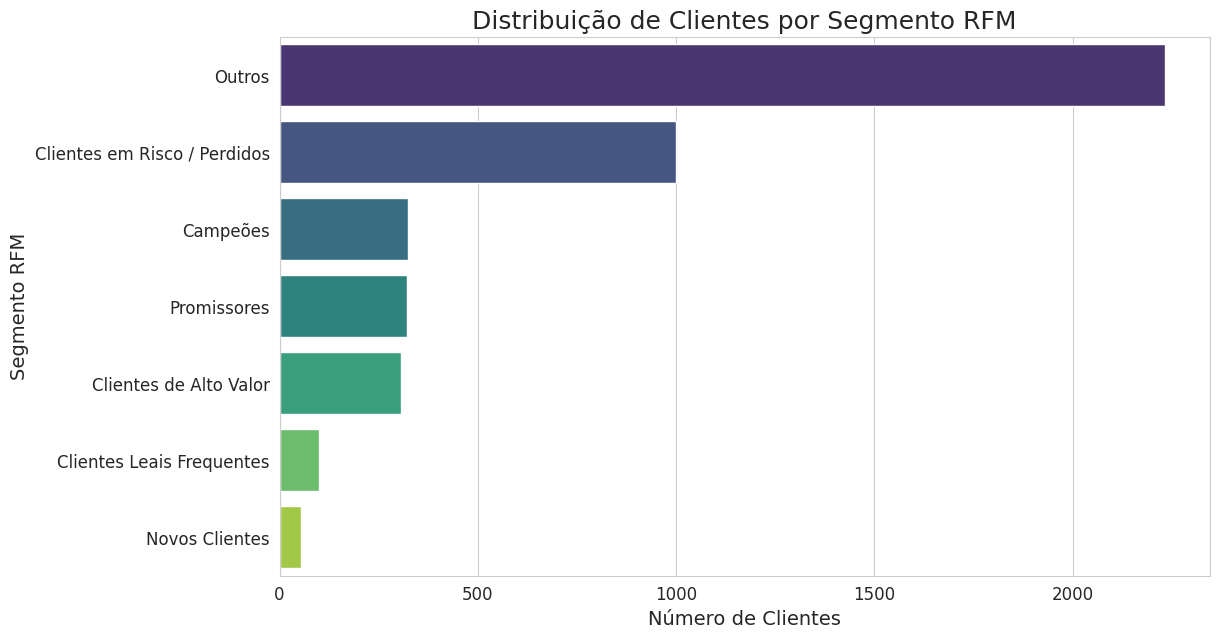

In [ ]:
# Configurar o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão para figuras

# 1. Gráfico de Barras da Distribuição dos Segmentos RFM
plt.figure(figsize=(12, 7))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Distribuição de Clientes por Segmento RFM', fontsize=18)
plt.xlabel('Número de Clientes', fontsize=14)
plt.ylabel('Segmento RFM', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

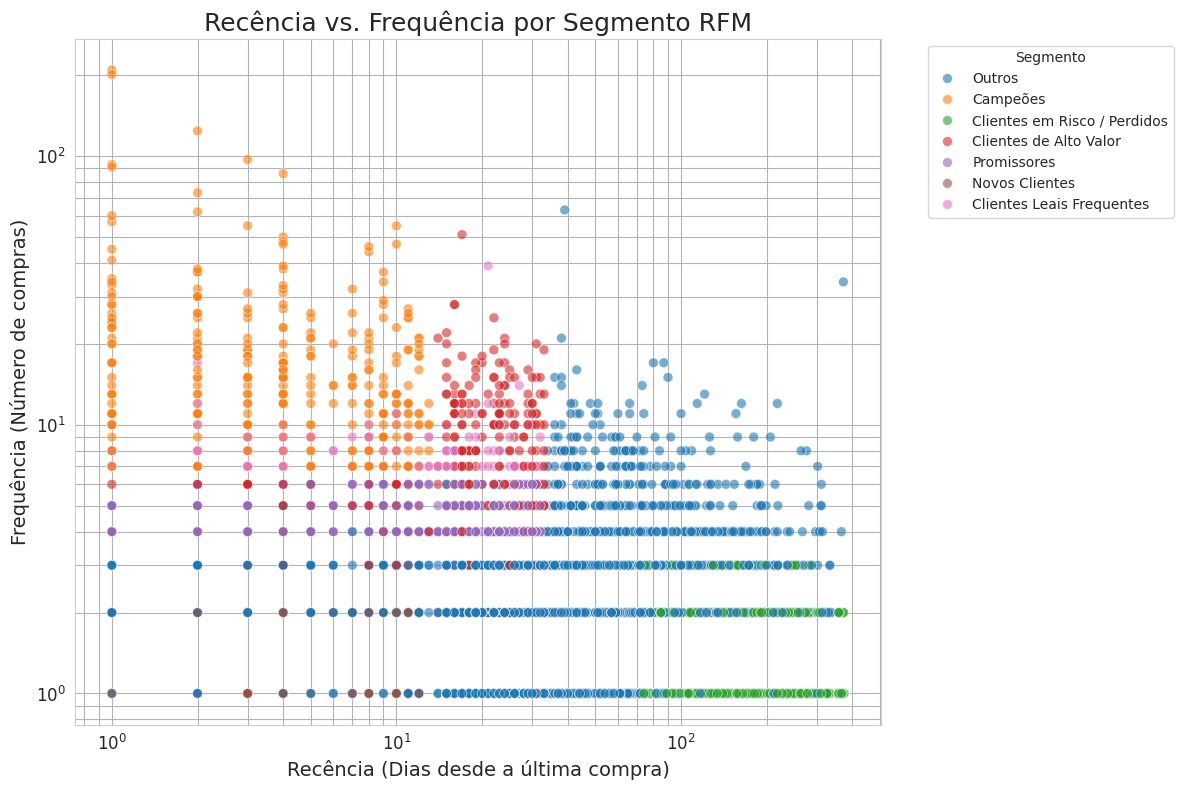

In [ ]:
# 2. Gráfico de Dispersão (Scatter Plot) de Recência vs. Frequência (com cores por Segmento)
# Este gráfico ajuda a visualizar onde os segmentos se posicionam no plano R x F
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm, palette='tab10', alpha=0.6, s=50)
plt.title('Recência vs. Frequência por Segmento RFM', fontsize=18)
plt.xlabel('Recência (Dias desde a última compra)', fontsize=14)
plt.ylabel('Frequência (Número de compras)', fontsize=14)
plt.xscale('log') # Escala logarítmica para Recência para melhor visualização (valores muito dispersos)
plt.yscale('log') # Escala logarítmica para Frequência para melhor visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", c=".7")
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-3105127362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monetary_by_segment.index, y=monetary_by_segment.values, palette='magma')


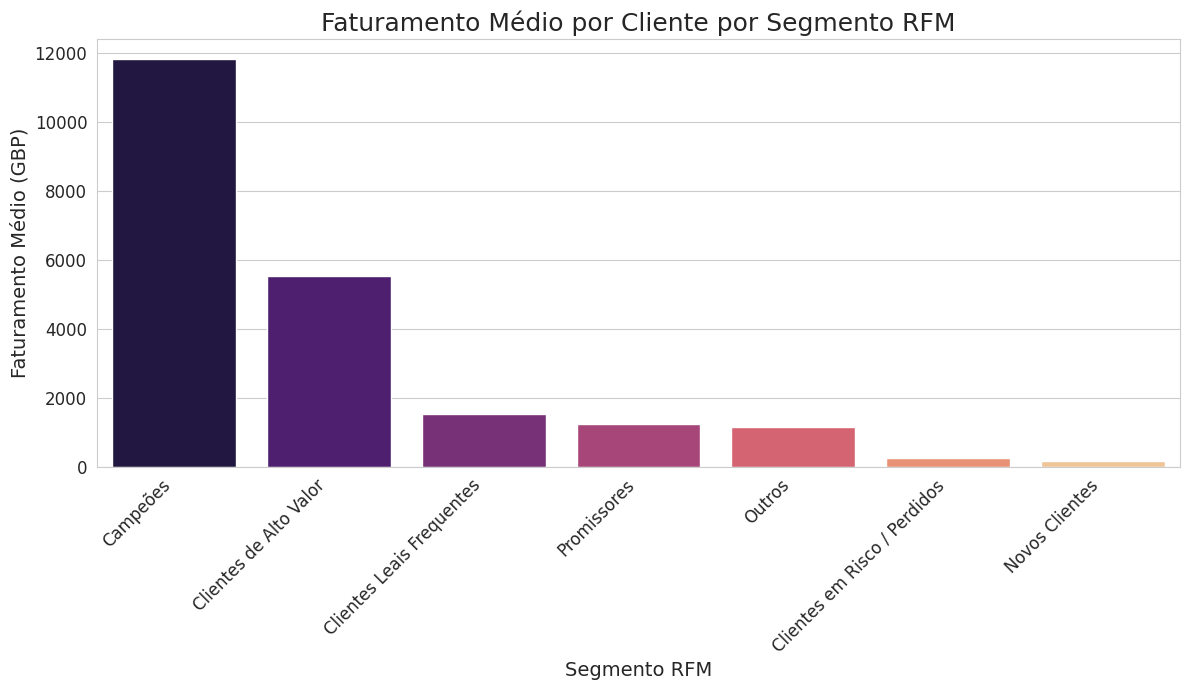

In [ ]:
# 3. Gráfico de Barras da Média de Monetário por Segmento (Ordenado)
# Isso visualiza o que já vimos na tabela, mas de forma mais impactante
monetary_by_segment = rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=monetary_by_segment.index, y=monetary_by_segment.values, palette='magma')
plt.title('Faturamento Médio por Cliente por Segmento RFM', fontsize=18)
plt.xlabel('Segmento RFM', fontsize=14)
plt.ylabel('Faturamento Médio (GBP)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-1112774730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Recency', data=rfm, order=monetary_by_segment.index, palette='viridis')


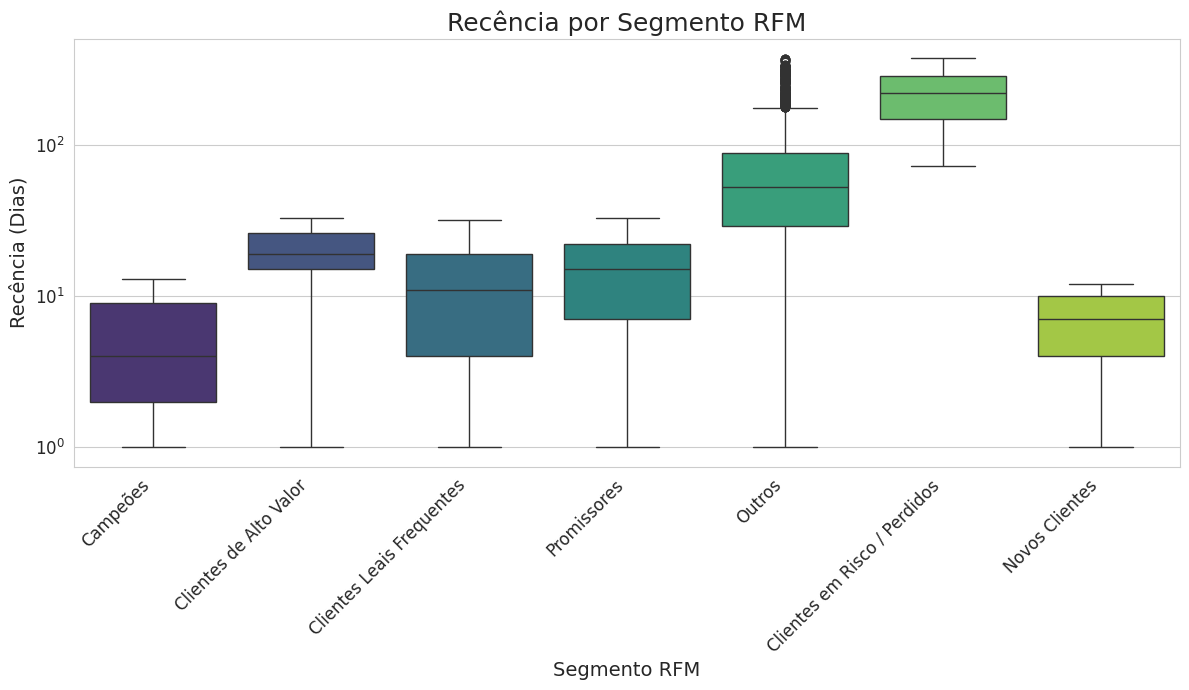

In [ ]:
# Opcional: Para ter uma visão geral da Recência e Frequência por Segmento, você pode usar boxplots
# Boxplot de Recência por Segmento
plt.figure(figsize=(12, 7))
sns.boxplot(x='Segment', y='Recency', data=rfm, order=monetary_by_segment.index, palette='viridis')
plt.title('Recência por Segmento RFM', fontsize=18)
plt.xlabel('Segmento RFM', fontsize=14)
plt.ylabel('Recência (Dias)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log') # Escala logarítmica para Recência
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-473687399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Frequency', data=rfm, order=monetary_by_segment.index, palette='viridis')


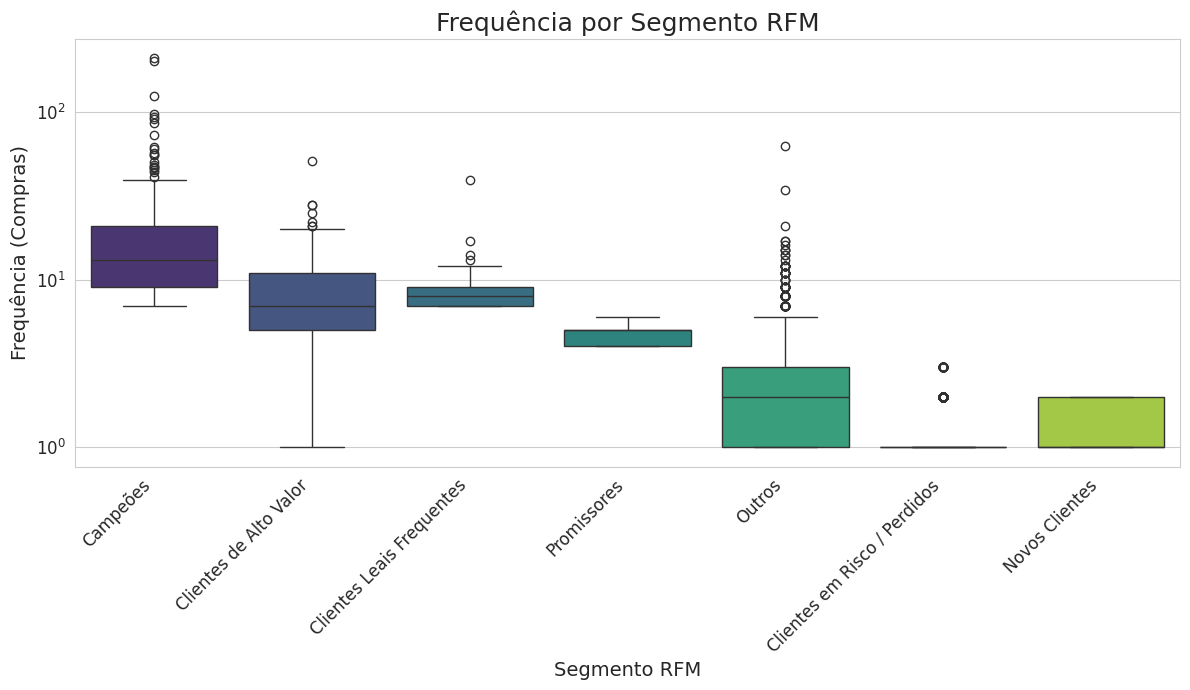

In [ ]:
# Boxplot de Frequência por Segmento
plt.figure(figsize=(12, 7))
sns.boxplot(x='Segment', y='Frequency', data=rfm, order=monetary_by_segment.index, palette='viridis')
plt.title('Frequência por Segmento RFM', fontsize=18)
plt.xlabel('Segmento RFM', fontsize=14)
plt.ylabel('Frequência (Compras)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log') # Escala logarítmica para Frequência
plt.tight_layout()
plt.show()

In [ ]:
# Exportando bases de dados para CSV e posterior importação no power bi

rfm.to_csv('rfm_segmentation.csv', index=False, encoding='utf-8')
df.to_csv('ecommerce_transactions_treated.csv', index=False, encoding='utf-8')

In [ ]:
print(df['TotalPrice'].sum())

8911407.904
